<a href="https://colab.research.google.com/github/Luvi64bit/SVR/blob/main/Support_Vector_Machine_(SVR)_and_Project_2_Prediction_of_Engineering_graduate_Salary_using_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Problem Statement
Given a dataset which represents the parameters of an Engineering gradute based on which that salary will be given to him/her. You have to build a model to predict the Engineering graduate salary based on the provided features.

In [ ]:
df = pd.read_csv('/content/Engineering_graduate_salary.csv')

In [ ]:
df

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


# Data Description
ID: A unique ID to identify a candidate

Salary: Annual CTC offered to the candidate (in INR)

Gender: Candidate's gender

DOB: Date of birth of the candidate

10percentage: Overall marks obtained in grade 10 examinations

10board: The school board whose curriculum the candidate followed in grade 10

12graduation: Year of graduation - senior year high school

12percentage: Overall marks obtained in grade 12 examinations

12board: The school board whose curriculum the candidate followed

CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate

CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.

Degree: Degree obtained/pursued by the candidate

Specialization: Specialization pursued by the candidate

CollegeGPA: Aggregate GPA at graduation

CollegeCityID: A unique ID to identify the city in which the college is located in.

CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.

CollegeState: Name of the state in which the college is located

GraduationYear: Year of graduation (Bachelor's degree)

English: Scores in AMCAT English section

Logical: Score in AMCAT Logical ability section

Quant: Score in AMCAT's Quantitative ability section

Domain: Scores in AMCAT's domain module

ComputerProgramming: Score in AMCAT's Computer programming section

ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section

ComputerScience: Score in AMCAT's Computer Science section

MechanicalEngg: Score in AMCAT's Mechanical Engineering section

ElectricalEngg: Score in AMCAT's Electrical Engineering section

TelecomEngg: Score in AMCAT's Telecommunication Engineering section

CivilEngg: Score in AMCAT's Civil Engineering section

conscientiousness: Scores in one of the sections of AMCAT's personality test

agreeableness: Scores in one of the sections of AMCAT's personality test

extraversion: Scores in one of the sections of AMCAT's personality test

nueroticism: Scores in one of the sections of AMCAT's personality test

openesstoexperience: Scores in one of the sections of AMCAT's personality test

# EDA - Exploratory Data Analysis

In [ ]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.shape

(2998, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [ ]:
df.isna().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [ ]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [ ]:
# Removing the columns - ID, 10board, 12board, CollegeID, CollegeCityID, CollegeCityTier,
# CollegeCityTier, CollegeState

In [ ]:
df = df.drop(['ID','10board','12board','CollegeID',
         'CollegeCityID', 'CollegeCityTier',
       'CollegeState'], axis=1)

In [ ]:
df.shape

(2998, 27)

In [ ]:
df.columns

Index(['Gender', 'DOB', '10percentage', '12graduation', '12percentage',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [ ]:
df.head(1)

,Gender,DOB,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990-10-22,87.8,2009,84.0,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,...,-1,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000


In [ ]:
df.Gender.value_counts()

m    2282
f     716
Name: Gender, dtype: int64

In [ ]:
enc = LabelEncoder()

In [ ]:
df.Gender = enc.fit_transform(df.Gender)

1 -> M

0 -> F







In [ ]:
df.Gender.value_counts()

1    2282
0     716
Name: Gender, dtype: int64

In [ ]:
df.head(1)

,Gender,DOB,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,1990-10-22,87.8,2009,84.0,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,...,-1,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000


In [ ]:
df['10percentage'].describe()

count    2998.000000
mean       77.666264
std        10.002785
min        43.000000
25%        71.140000
50%        78.965000
75%        85.600000
max        97.760000
Name: 10percentage, dtype: float64

In [ ]:
df['12graduation'].describe()

count    2998.000000
mean     2008.080720
std         1.631814
min      1998.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2012.000000
Name: 12graduation, dtype: float64

In [ ]:
df['12percentage'].describe()

count    2998.000000
mean       74.341061
std        11.120299
min        40.000000
25%        66.000000
50%        74.000000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64

In [ ]:
df.CollegeTier.value_counts()

2    2772
1     226
Name: CollegeTier, dtype: int64

In [ ]:
df.head(1)

,Gender,DOB,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,1990-10-22,87.8,2009,84.0,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,...,-1,-1,-1,-1,-0.159,0.3789,1.2396,0.1459,0.2889,445000


In [ ]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [ ]:
df['DOB'].max().year

1997

In [ ]:
df['DOB'].min().year

1981

In [ ]:
age = []
for date in df['DOB']:
  age.append(2018 - int(date.year))

df['Age'] = age

In [ ]:
df.head()

,Gender,DOB,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age
0,0,1990-10-22,87.80,2009,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,...,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,28
1,1,1990-05-15,57.00,2010,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,2014,...,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,28
2,1,1989-08-21,77.33,2007,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,...,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,29
3,1,1991-05-04,84.30,2009,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,2013,...,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,27
4,0,1990-10-30,82.00,2008,75.00,2,B.Tech/B.E.,biotechnology,64.30,2012,...,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,28


In [ ]:
df = df.drop(['DOB'],axis=1)

In [ ]:
df.head()

,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age
0,0,87.80,2009,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,...,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,28
1,1,57.00,2010,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,...,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,28
2,1,77.33,2007,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,...,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,29
3,1,84.30,2009,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,...,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,27
4,0,82.00,2008,75.00,2,B.Tech/B.E.,biotechnology,64.30,2012,575,...,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,28


In [ ]:
df.GraduationYear.describe()

count    2998.000000
mean     2011.939960
std        36.780582
min         0.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

In [ ]:
df.GraduationYear.median()

2013.0

In [ ]:
df.GraduationYear.replace(0,df.GraduationYear.median(),inplace = True)

In [ ]:
df.GraduationYear.describe()

count    2998.000000
mean     2012.611408
std         1.307340
min      2007.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

In [ ]:
df.head()

,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age
0,0,87.80,2009,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,2013,650,...,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,28
1,1,57.00,2010,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,2014,440,...,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,28
2,1,77.33,2007,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,2011,485,...,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,29
3,1,84.30,2009,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,2013,675,...,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,27
4,0,82.00,2008,75.00,2,B.Tech/B.E.,biotechnology,64.30,2012,575,...,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,28


In [ ]:
df.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [ ]:
# BTech/B.E. -> "Bachelors"
# MCA, M.Tech./M.E., M.Sc. (Tech.) -> 'Masters'

In [ ]:
df.Degree.replace('B.Tech/B.E.',"Bachelors",inplace = True)

In [ ]:
df.Degree.replace(['M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],"Masters",inplace = True)

In [ ]:
df.Degree.unique()

array(['Bachelors', 'Masters'], dtype=object)

In [ ]:
df.Degree.value_counts()

Bachelors    2757
Masters       241
Name: Degree, dtype: int64

In [ ]:
df.Degree = enc.fit_transform(df.Degree)

In [ ]:
df.Degree.value_counts()

0    2757
1     241
Name: Degree, dtype: int64

 **0 -> Bachelors**

 **1 -> Masters**

In [ ]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [ ]:
df.Specialization.values

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', ..., 'information technology',
       'computer engineering', 'information technology'], dtype=object)

In [ ]:
category_mapping = {
    'electronics and communication engineering': 'Electronics and Communication Engineering',
    'computer science & engineering': 'Computer Science and Engineering',
    'information technology': 'Information Technology',
    'computer engineering': 'Computer Science and Engineering',
    'computer application': 'Computer Science and Engineering',
    'mechanical engineering': 'Mechanical Engineering',
    'electronics and electrical engineering': 'Electronics and Communication Engineering',
    'electronics & telecommunications': 'Electronics and Communication Engineering',
    'electrical engineering': 'Electronics and Communication Engineering',
    'electronics & instrumentation eng': 'Electronics and Instrumentation Engineering',
    'instrumentation and control engineering': 'Instrumentation and Control Engineering',
    'information science engineering': 'Information Technology',
    'electronics and instrumentation engineering': 'Electronics and Instrumentation Engineering',
    'civil engineering': 'Other Engineering Disciplines',
    'electronics engineering': 'Electronics and Communication Engineering',
    'biotechnology': 'Other Engineering Disciplines',
    'other': 'Other Engineering Disciplines',
    'industrial & production engineering': 'Mechanical Engineering',
    'chemical engineering': 'Other Engineering Disciplines',
    'applied electronics and instrumentation': 'Electronics and Instrumentation Engineering',
    'mechanical and automation': 'Mechanical Engineering',
    'telecommunication engineering': 'Electronics and Communication Engineering',
    'automobile/automotive engineering': 'Other Engineering Disciplines',
    'computer science and technology': 'Computer Science and Engineering',
    'aeronautical engineering': 'Other Engineering Disciplines',
    'instrumentation engineering': 'Electronics and Instrumentation Engineering',
    'electronics and computer engineering': 'Electronics and Communication Engineering',
    'mechatronics': 'Mechanical Engineering',
    'metallurgical engineering': 'Other Engineering Disciplines',
    'industrial engineering': 'Other Engineering Disciplines',
    'biomedical engineering': 'Other Engineering Disciplines',
    'information & communication technology': 'Information Technology',
    'electronics': 'Electronics and Communication Engineering',
    'embedded systems technology': 'Electronics and Communication Engineering',
    'industrial & management engineering': 'Other Engineering Disciplines',
    'electrical and power engineering': 'Electronics and Communication Engineering',
    'computer and communication engineering': 'Computer Science and Engineering',
    'mechanical & production engineering': 'Mechanical Engineering',
    'control and instrumentation engineering': 'Electronics and Instrumentation Engineering',
    'ceramic engineering': 'Other Engineering Disciplines',
    'computer networking': 'Information Technology',
    'information science': 'Information Technology'
}

# Map the categories in the dataframe
df['Specialization'] = df['Specialization'].map(category_mapping)

In [ ]:
df.Specialization.value_counts()

Computer Science and Engineering               1178
Electronics and Communication Engineering       993
Information Technology                          527
Mechanical Engineering                          172
Other Engineering Disciplines                    59
Electronics and Instrumentation Engineering      51
Instrumentation and Control Engineering          18
Name: Specialization, dtype: int64

In [ ]:
df.head()

,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age
0,0,87.80,2009,84.00,1,0,Instrumentation and Control Engineering,73.82,2013,650,...,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,28
1,1,57.00,2010,64.50,2,0,Computer Science and Engineering,65.00,2014,440,...,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,28
2,1,77.33,2007,85.17,2,0,Electronics and Communication Engineering,61.94,2011,485,...,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,29
3,1,84.30,2009,86.00,1,0,Computer Science and Engineering,80.40,2013,675,...,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,27
4,0,82.00,2008,75.00,2,0,Other Engineering Disciplines,64.30,2012,575,...,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,28


In [ ]:
df.collegeGPA.describe()

count    2998.000000
mean       71.509857
std         8.122462
min         6.630000
25%        66.530000
50%        71.800000
75%        76.300000
max        99.930000
Name: collegeGPA, dtype: float64

In [ ]:
df.columns

Index(['Gender', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary', 'Age'],
      dtype='object')

In [ ]:
df.iloc[:,13:20] = df.iloc[:,13:20].replace(-1,0)

In [ ]:
df.iloc[:,13:20]

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,485,366,0,0,0,0,0
1,365,0,0,0,0,0,0
2,0,400,0,0,0,260,0
3,655,0,0,0,0,0,0
4,315,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2993,245,333,0,0,0,0,0
2994,315,0,0,0,0,0,0
2995,435,0,0,0,0,0,0
2996,545,0,0,0,0,0,0


In [ ]:
df.ComputerProgramming.isna().sum()

0

In [ ]:
p = df.iloc[0,13:20]
p


ComputerProgramming      485
ElectronicsAndSemicon    366
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
Name: 0, dtype: object

In [ ]:
z = 0
sum = 0
for i in p:
  if i > 0 : z += 1
  sum += i
ans = sum/z
ans

425.5

In [ ]:
Domain_value = []

In [ ]:
for i in range(len(df)):
  n = 0
  sum = 0
  for z in df.iloc[i,13:20]:
    if z > 0 :
      n += 1
    sum += z
  if sum == 0:
    ans = sum
  else:
    ans = sum/n
  Domain_value.append(ans)

In [ ]:
print(Domain_value)

[425.5, 365.0, 330.0, 655.0, 315.0, 356.0, 469.0, 465.0, 481.5, 396.0, 332.5, 435.5, 485.0, 495.5, 335.0, 415.0, 475.0, 477.5, 495.0, 450.5, 295.0, 495.0, 565.0, 333.0, 359.5, 405.0, 330.75, 645.0, 253.0, 485.0, 545.0, 431.0, 645.0, 460.5, 408.0, 549.0, 435.0, 335.0, 390.5, 595.0, 460.5, 565.0, 435.0, 425.5, 466.0, 300.0, 580.0, 525.0, 497.5, 300.0, 262.5, 516.5, 267.5, 426.0, 386.5, 300.0, 335.0, 365.0, 465.0, 445.0, 439.0, 465.0, 307.5, 393.6666666666667, 515.0, 497.0, 314.0, 295.5, 465.0, 420.5, 254.0, 435.0, 465.0, 366.0, 415.0, 481.5, 430.5, 292.5, 0, 416.5, 350.5, 605.0, 507.5, 332.5, 326.0, 532.5, 282.5, 285.0, 366.0, 391.5, 260.0, 0, 254.0, 337.5, 435.5, 477.0, 421.5, 375.0, 292.0, 562.5, 385.0, 473.0, 376.5, 403.5, 395.0, 485.0, 462.5, 545.0, 213.0, 535.0, 402.5, 350.5, 445.0, 625.0, 465.0, 355.5, 595.0, 415.0, 0, 435.0, 436.5, 461.0, 445.0, 223.0, 555.0, 383.0, 625.0, 440.5, 435.0, 411.5, 336.0, 370.0, 346.0, 580.0, 517.5, 517.5, 393.6666666666667, 405.5, 360.5, 485.0, 341.0,

In [ ]:
len(Domain_value)

2998

In [ ]:
df['Domain_value'] = Domain_value

In [ ]:
df.head()

,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,Domain_value
0,0,87.80,2009,84.00,1,0,Instrumentation and Control Engineering,73.82,2013,650,...,0,0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,28,425.5
1,1,57.00,2010,64.50,2,0,Computer Science and Engineering,65.00,2014,440,...,0,0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,28,365.0
2,1,77.33,2007,85.17,2,0,Electronics and Communication Engineering,61.94,2011,485,...,260,0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,29,330.0
3,1,84.30,2009,86.00,1,0,Computer Science and Engineering,80.40,2013,675,...,0,0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,27,655.0
4,0,82.00,2008,75.00,2,0,Other Engineering Disciplines,64.30,2012,575,...,0,0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,28,315.0


In [ ]:
df.Domain_value.describe()

count    2998.000000
mean      408.493774
std       118.314066
min         0.000000
25%       345.500000
50%       411.833333
75%       480.875000
max       804.000000
Name: Domain_value, dtype: float64

In [ ]:
df.columns

Index(['Gender', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary', 'Age', 'Domain_value'],
      dtype='object')

In [ ]:
df = df.drop(['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg'],axis = 1)

In [ ]:
df.shape

(2998, 21)

In [ ]:
df.describe()

,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,Domain_value
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03,2998.000000,2998.000000
mean,0.761174,77.666264,2008.080720,74.341061,1.924616,0.080387,71.509857,2012.611408,501.066378,500.431621,514.137759,0.508458,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05,27.573382,408.493774
std,0.426437,10.002785,1.631814,11.120299,0.264053,0.271937,8.122462,1.307340,105.304512,87.299850,122.194955,0.463373,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05,1.751434,118.314066
min,0.000000,43.000000,1998.000000,40.000000,1.000000,0.000000,6.630000,2007.000000,180.000000,195.000000,120.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04,21.000000,0.000000
25%,1.000000,71.140000,2007.000000,66.000000,2.000000,0.000000,66.530000,2012.000000,425.000000,441.250000,430.000000,0.342315,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05,26.000000,345.500000
50%,1.000000,78.965000,2008.000000,74.000000,2.000000,0.000000,71.800000,2013.000000,500.000000,505.000000,515.000000,0.622643,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05,27.000000,411.833333
75%,1.000000,85.600000,2009.000000,82.600000,2.000000,0.000000,76.300000,2014.000000,570.000000,565.000000,595.000000,0.835612,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05,29.000000,480.875000
max,1.000000,97.760000,2012.000000,98.700000,2.000000,1.000000,99.930000,2017.000000,875.000000,795.000000,900.000000,0.999910,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06,37.000000,804.000000


In [ ]:
df.corr()

<ipython-input-147-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,Domain_value
Gender,1.000000,-0.165269,-0.058597,-0.139944,-0.035484,0.010235,-0.169005,0.015422,0.012799,0.015139,0.099537,-0.005598,-0.074675,-0.078982,-0.005639,-0.006324,-0.085737,0.038933,0.045810,0.028714
10percentage,-0.165269,1.000000,0.273813,0.645578,-0.144178,-0.245493,0.311209,0.097995,0.348452,0.309558,0.328888,0.079927,0.066644,0.136332,-0.007811,-0.131151,0.034869,0.181414,-0.243831,0.115332
12graduation,-0.058597,0.273813,1.000000,0.255780,0.004834,-0.371792,0.059786,0.794393,0.157822,0.103767,0.007854,-0.038321,0.110645,0.050309,0.055530,-0.076572,-0.015313,-0.161793,-0.866124,-0.042361
12percentage,-0.139944,0.645578,0.255780,1.000000,-0.113101,-0.228408,0.335041,0.055919,0.211218,0.237480,0.316400,0.073431,0.057277,0.099645,-0.012765,-0.088635,0.007041,0.172755,-0.263687,0.117745
CollegeTier,-0.035484,-0.144178,0.004834,-0.113101,1.000000,-0.013162,-0.088604,-0.042357,-0.185937,-0.195125,-0.252881,-0.040989,0.045099,-0.042588,-0.010184,0.033292,-0.029322,-0.177975,-0.024109,-0.105635
Degree,0.010235,-0.245493,-0.371792,-0.228408,-0.013162,1.000000,0.090989,-0.007836,-0.131411,-0.071231,-0.110969,0.022890,-0.007337,-0.035813,-0.005802,0.021873,-0.001217,-0.022636,0.325636,0.085610
collegeGPA,-0.169005,0.311209,0.059786,0.335041,-0.088604,0.090989,1.000000,0.066938,0.100617,0.192549,0.219545,0.091883,0.052435,0.060789,-0.050995,-0.067701,0.013691,0.131912,-0.089334,0.166673
GraduationYear,0.015422,0.097995,0.794393,0.055919,-0.042357,-0.007836,0.066938,1.000000,0.125776,0.093316,-0.001954,-0.032320,0.116534,0.024520,0.064812,-0.076998,-0.016620,-0.214592,-0.747857,-0.005707
English,0.012799,0.348452,0.157822,0.211218,-0.185937,-0.131411,0.100617,0.125776,1.000000,0.441358,0.375415,0.097777,0.028773,0.191400,0.007065,-0.148064,0.073529,0.179668,-0.112865,0.195872
Logical,0.015139,0.309558,0.103767,0.237480,-0.195125,-0.071231,0.192549,0.093316,0.441358,1.000000,0.511049,0.178285,0.018574,0.159086,-0.006037,-0.187744,0.049579,0.193647,-0.094592,0.301159


In [ ]:
model = SVR()

In [ ]:
X = df.drop(['Salary','Specialization'],axis = 1)
y = df.Salary

In [ ]:
y.ndim


1

In [ ]:
X.ndim

2

In [ ]:
X.shape

(2998, 19)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

-0.006355318232976304

In [ ]:
data = pd.DataFrame(y_test,y_pred )

In [ ]:
data

,Salary
299986.875350,NaN
300002.522705,NaN
299992.878770,NaN
300005.226751,NaN
299997.645724,NaN
...,...
300008.002560,NaN
300000.394673,NaN
300012.865847,NaN
299992.053259,NaN


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
modl = ExtraTreesRegressor()
modl.fit(X,y)

ExtraTreesRegressor()

In [ ]:
modl.feature_importances_

array([0.0220529 , 0.06220325, 0.05241982, 0.05884349, 0.02836003,
       0.02077462, 0.05012572, 0.079152  , 0.0595354 , 0.06208139,
       0.09393397, 0.04503434, 0.05820074, 0.04957184, 0.0514573 ,
       0.03697996, 0.05228295, 0.05334307, 0.06364719])

In [ ]:
importance_features = pd.Series(modl.feature_importances_,
                                index = X.columns)

In [ ]:
importance_features

Gender                   0.022053
10percentage             0.062203
12graduation             0.052420
12percentage             0.058843
CollegeTier              0.028360
Degree                   0.020775
collegeGPA               0.050126
GraduationYear           0.079152
English                  0.059535
Logical                  0.062081
Quant                    0.093934
Domain                   0.045034
conscientiousness        0.058201
agreeableness            0.049572
extraversion             0.051457
nueroticism              0.036980
openess_to_experience    0.052283
Age                      0.053343
Domain_value             0.063647
dtype: float64

<Axes: >

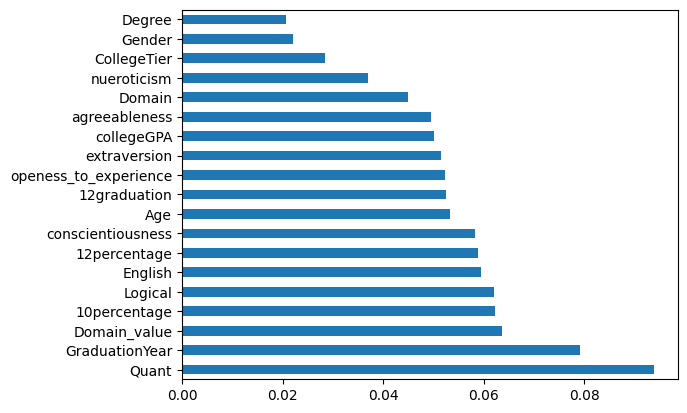

In [ ]:
importance_features.nlargest(20).plot(kind='barh')

In [ ]:
var = importance_features.nlargest(15).index

In [ ]:
var

Index(['Quant', 'GraduationYear', 'Domain_value', '10percentage', 'Logical',
       'English', '12percentage', 'conscientiousness', 'Age', '12graduation',
       'openess_to_experience', 'extraversion', 'collegeGPA', 'agreeableness',
       'Domain'],
      dtype='object')

In [ ]:
X[list(var)]

,Quant,GraduationYear,Domain_value,10percentage,Logical,English,12percentage,conscientiousness,Age,12graduation,openess_to_experience,extraversion,collegeGPA,agreeableness,Domain
0,810,2013,425.5,87.80,665,650,84.00,-0.1590,28,2009,0.2889,1.2396,73.82,0.3789,0.694479
1,210,2014,365.0,57.00,435,440,64.50,1.1336,28,2010,-0.2859,1.2396,65.00,0.0459,0.342315
2,505,2011,330.0,77.33,475,485,85.17,0.5100,29,2007,-0.2875,1.5428,61.94,-0.1232,0.824666
3,635,2013,655.0,84.30,620,675,86.00,-0.4463,27,2009,0.4805,0.3174,80.40,0.2124,0.990009
4,365,2012,315.0,82.00,495,575,75.00,-1.4992,28,2008,0.1864,-1.0697,64.30,-0.7473,0.278457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,445,2010,289.0,75.00,485,505,73.00,-1.1901,29,2005,0.0284,-1.0697,70.00,0.9688,0.538387
2994,395,2012,315.0,84.00,585,345,77.00,-0.1082,27,2008,0.5024,-0.4891,75.20,0.0328,0.190153
2995,485,2011,435.0,91.40,425,385,65.56,-0.8810,30,2006,0.6603,-0.3440,73.19,0.1888,0.600057
2996,505,2011,545.0,88.64,645,465,65.16,1.4374,30,2006,0.5419,-0.4891,74.81,1.2808,0.901490


In [ ]:
new_x = X[var]

In [ ]:
nX_train, nX_test, y_train, y_test = train_test_split(new_x,y,test_size=0.2)

In [ ]:
model.fit(nX_train,y_train)

SVR()

In [ ]:
y_pred = model.predict(nX_test)

In [ ]:
r2_score(y_test, y_pred)

-0.0008545778120501168